In [1]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import numpy as np
import time
import lightgbm as lgb
import datetime
import time

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold,GroupKFold,StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
ID_52_2020_0809 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/ID_52_2020_0809.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_85_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_085_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_86_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_086_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_13_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_013_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_45_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_045_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_70_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_070_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_72_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_072_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_133_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_133_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_134_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_134_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_135_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_135_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_136_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_136_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_137_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_137_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_138_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_138_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_139_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_139_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_140_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_140_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')

In [16]:
ID_52_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_052_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')

In [3]:
#目标变量
TREE_1=ID_52_2020_0809
TREE_1.rename(columns = {'TagValue':'TagValue_52'}, inplace=True)

In [4]:
def zusammen(data,TREE_1):
    data = data[(data['CreateDateTime']>'2020-08-05 00:00:00')&(data['CreateDateTime']<'2020-08-20 00:00:00')]
    data = data.drop('TagId',axis = 1) 
    TREE_1 = TREE_1.set_index('CreateDateTime').join(data.set_index('CreateDateTime'),lsuffix = '_l', rsuffix = '_r',how = 'outer')
    TREE_1 = TREE_1.reset_index('CreateDateTime')
#     TREE_1 = TREE_1.fillna(method = "ffill")
    return TREE_1

In [5]:
TREE_1 = zusammen(ID_85_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_85'}, inplace=True)
TREE_1 = zusammen(ID_45_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_45'}, inplace=True)
TREE_1 = zusammen(ID_13_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_13'}, inplace=True)
TREE_1 = zusammen(ID_70_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_70'}, inplace=True)
TREE_1 = zusammen(ID_72_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_72'}, inplace=True)
TREE_1 = zusammen(ID_86_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_86'}, inplace=True)
TREE_1 = zusammen(ID_133_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_133'}, inplace=True)
TREE_1 = zusammen(ID_134_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_134'}, inplace=True)
TREE_1 = zusammen(ID_135_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_135'}, inplace=True)
TREE_1 = zusammen(ID_136_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_136'}, inplace=True)
TREE_1 = zusammen(ID_137_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_137'}, inplace=True)
TREE_1 = zusammen(ID_138_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_138'}, inplace=True)
TREE_1 = zusammen(ID_139_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_139'}, inplace=True)
TREE_1 = zusammen(ID_140_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_140'}, inplace=True)
TREE_1['TagValue_85'] = TREE_1['TagValue_85'].fillna(method = "ffill")
TREE_1['TagValue_86'] = TREE_1['TagValue_86'].fillna(method = "ffill")
TREE_1['TagValue_45'] = TREE_1['TagValue_45'].fillna(method = "ffill")
TREE_1['TagValue_13'] = TREE_1['TagValue_13'].fillna(method = "ffill")
TREE_1['TagValue_70'] = TREE_1['TagValue_70'].fillna(method = "ffill")
TREE_1['TagValue_72'] = TREE_1['TagValue_72'].fillna(method = "ffill")
TREE_1['TagValue_133'] = TREE_1['TagValue_133'].fillna(method = "ffill")
TREE_1['TagValue_134'] = TREE_1['TagValue_134'].fillna(method = "ffill")
TREE_1['TagValue_135'] = TREE_1['TagValue_135'].fillna(method = "ffill")
TREE_1['TagValue_136'] = TREE_1['TagValue_136'].fillna(method = "ffill")
TREE_1['TagValue_137'] = TREE_1['TagValue_137'].fillna(method = "ffill")
TREE_1['TagValue_138'] = TREE_1['TagValue_138'].fillna(method = "ffill")
TREE_1['TagValue_139'] = TREE_1['TagValue_139'].fillna(method = "ffill")
TREE_1['TagValue_140'] = TREE_1['TagValue_140'].fillna(method = "ffill")
TREE_1['diff_float'] = TREE_1['CreateDateTime'].diff().dt.total_seconds()
TREE_1

,CreateDateTime,TagValue_52,TagId,TagValue_85,TagValue_45,TagValue_13,TagValue_70,TagValue_72,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,TagValue_137,TagValue_138,TagValue_139,TagValue_140,diff_float
0,2020-08-05 00:00:00.348,2.633102,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-08-05 00:00:00.974,2.604167,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.626
2,2020-08-05 00:00:01.175,2.633102,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.201
3,2020-08-05 00:00:01.568,2.604167,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.393
4,2020-08-05 00:00:02.403,2.633102,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2750480,2020-08-19 23:59:59.218,4.542824,52.0,1.0,1.0,0.0,89.797974,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.206
2750481,2020-08-19 23:59:59.414,NaN,NaN,1.0,1.0,0.0,89.797974,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.196
2750482,2020-08-19 23:59:59.424,4.513889,52.0,1.0,1.0,0.0,89.797974,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010
2750483,2020-08-19 23:59:59.632,4.456018,52.0,1.0,1.0,0.0,89.797974,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.208


In [6]:
TREE_1.loc[TREE_1['diff_float'] > 1800]

,CreateDateTime,TagValue_52,TagId,TagValue_85,TagValue_45,TagValue_13,TagValue_70,TagValue_72,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,TagValue_137,TagValue_138,TagValue_139,TagValue_140,diff_float
456757,2020-08-08 02:00:01.298,2.748842,52.0,1.0,0.0,0.0,0.0,50.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84460.295
2040455,2020-08-16 02:00:01.034,4.224537,52.0,0.0,0.0,0.0,0.0,50.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3393.453
2168553,2020-08-17 02:00:00.287,NaN,NaN,0.0,0.0,1.0,0.0,12.5885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36129.904


In [7]:
def NaNjgtc(data):
#     columns = [col for col in data.columns if col in ['CreateDateTime', 'TagValue_51', 'diff_float']]
#     X = TREE_1[columns]
#     X.isnull().sum()
#     X.loc[(X['diff_float'] > 1800)]
    data.loc[(data['diff_float'] > 1800),'TagValue_52'] = data.loc[(data['diff_float'] > 1800),'TagValue_52'].fillna(0)
#     X.loc[(X['diff_float'] > 1800)]
#     X.isnull().sum()
    return data

In [8]:
TREE_2 = NaNjgtc(TREE_1)
TREE_2

,CreateDateTime,TagValue_52,TagId,TagValue_85,TagValue_45,TagValue_13,TagValue_70,TagValue_72,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,TagValue_137,TagValue_138,TagValue_139,TagValue_140,diff_float
0,2020-08-05 00:00:00.348,2.633102,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-08-05 00:00:00.974,2.604167,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.626
2,2020-08-05 00:00:01.175,2.633102,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.201
3,2020-08-05 00:00:01.568,2.604167,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.393
4,2020-08-05 00:00:02.403,2.633102,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2750480,2020-08-19 23:59:59.218,4.542824,52.0,1.0,1.0,0.0,89.797974,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.206
2750481,2020-08-19 23:59:59.414,NaN,NaN,1.0,1.0,0.0,89.797974,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.196
2750482,2020-08-19 23:59:59.424,4.513889,52.0,1.0,1.0,0.0,89.797974,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010
2750483,2020-08-19 23:59:59.632,4.456018,52.0,1.0,1.0,0.0,89.797974,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.208


In [9]:
TREE_2['TagValue_52'] = TREE_2['TagValue_52'].fillna(method = "ffill")
TREE_2 = TREE_2.drop('TagId',axis = 1)
TREE_2['TagValue_133_lag1'] = TREE_2['TagValue_133'].shift(1)
TREE_2['TagValue_133_lag2'] = TREE_2['TagValue_133'].shift(2)
TREE_2['TagValue_134_lag1'] = TREE_2['TagValue_134'].shift(1)
TREE_2['TagValue_134_lag2'] = TREE_2['TagValue_134'].shift(2)
TREE_2['TagValue_135_lag1'] = TREE_2['TagValue_135'].shift(1)
TREE_2['TagValue_135_lag2'] = TREE_2['TagValue_135'].shift(2)
TREE_2['TagValue_136_lag1'] = TREE_2['TagValue_136'].shift(1)
TREE_2['TagValue_136_lag2'] = TREE_2['TagValue_136'].shift(2)
TREE_2['TagValue_137_lag1'] = TREE_2['TagValue_137'].shift(1)
TREE_2['TagValue_137_lag2'] = TREE_2['TagValue_137'].shift(2)
TREE_2['TagValue_138_lag1'] = TREE_2['TagValue_138'].shift(1)
TREE_2['TagValue_138_lag2'] = TREE_2['TagValue_138'].shift(2)
# TREE_2['diff_52'] = TREE_2['TagValue_52'].diff()

In [10]:
gh = pd.DataFrame()
gh['CreateDateTime'] = ID_85_2020['CreateDateTime']
gh['CreateDateTime_85_0'] = ID_85_2020['CreateDateTime']
gh['CreateDateTime_85_1'] = ID_85_2020['CreateDateTime']
gh['TagValue'] = ID_85_2020['TagValue']
gh['TagId'] = ID_85_2020['TagId']
er = pd.DataFrame()
er['CreateDateTime'] = ID_45_2020['CreateDateTime']
er['CreateDateTime_45_0'] = ID_45_2020['CreateDateTime']
er['TagValue'] = ID_45_2020['TagValue']
er['TagId'] = ID_45_2020['TagId']

TREE_2 = zusammen(gh,TREE_2)
TREE_2['CreateDateTime_85_0'] = TREE_2['CreateDateTime_85_0'].fillna(method = "ffill")
TREE_2['CreateDateTime_85_1'] = TREE_2['CreateDateTime_85_1'].fillna(method = "bfill")
TREE_2['deltatime_85_0'] = TREE_2['CreateDateTime'] - TREE_2['CreateDateTime_85_0'] 
TREE_2['deltatime_85_0'] = TREE_2['deltatime_85_0'].dt.total_seconds()
TREE_2['deltatime_85_1'] = TREE_2['CreateDateTime_85_1'] - TREE_2['CreateDateTime'] 
TREE_2['deltatime_85_1'] = TREE_2['deltatime_85_1'].dt.total_seconds()
TREE_2 = TREE_2.drop('TagValue',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_85_0',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_85_1',axis = 1)
TREE_2 = zusammen(er,TREE_2)
TREE_2['CreateDateTime_45_0'] = TREE_2['CreateDateTime_45_0'].fillna(method = "ffill")
TREE_2['deltatime_45_0'] = TREE_2['CreateDateTime'] - TREE_2['CreateDateTime_45_0'] 
TREE_2['deltatime_45_0'] = TREE_2['deltatime_45_0'].dt.total_seconds()
TREE_2 = TREE_2.drop('TagValue',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_45_0',axis = 1)
TREE_2=TREE_2.copy()
TREE_2['timestamp'] = TREE_2['CreateDateTime'].values.astype(np.int64) // 10 ** 6 
TREE_2 = TREE_2.dropna()
TREE_2

,CreateDateTime,TagValue_52,TagValue_85,TagValue_45,TagValue_13,TagValue_70,TagValue_72,TagValue_86,TagValue_133,TagValue_134,...,TagValue_136_lag1,TagValue_136_lag2,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,deltatime_85_0,deltatime_85_1,deltatime_45_0,timestamp
1880,2020-08-05 00:12:29.444,3.964120,1.0,1.0,0.0,0.000000,26.300051,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,352.034,55.268,0.000,1596586349444
1881,2020-08-05 00:12:29.637,3.964120,1.0,1.0,0.0,0.000000,25.262449,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,352.227,55.075,0.193,1596586349637
1882,2020-08-05 00:12:29.847,3.964120,1.0,1.0,0.0,0.000000,24.221800,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,352.437,54.865,0.403,1596586349847
1883,2020-08-05 00:12:30.044,3.964120,1.0,1.0,0.0,0.000000,23.220831,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,352.634,54.668,0.600,1596586350044
1884,2020-08-05 00:12:30.248,3.964120,1.0,1.0,0.0,0.000000,22.201540,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,352.838,54.464,0.804,1596586350248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2750098,2020-08-19 23:57:33.879,2.633102,0.0,0.0,0.0,89.797974,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,482.637,1.026,482.636,1597881453879
2750099,2020-08-19 23:57:34.490,2.633102,0.0,0.0,0.0,89.797974,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,483.248,0.415,483.247,1597881454490
2750100,2020-08-19 23:57:34.706,2.893518,0.0,0.0,0.0,89.797974,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,483.464,0.199,483.463,1597881454706
2750101,2020-08-19 23:57:34.904,2.893518,0.0,0.0,0.0,89.797974,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,483.662,0.001,483.661,1597881454904


In [11]:
# TREE_2=TREE_2.copy()
# TREE_2['deltatime_85_0'].loc[TREE_2["TagValue_85"]== 0] = 0
# TREE_2['deltatime_85_1'].loc[TREE_2["TagValue_85"]== 0] = 0
# TREE_2['deltatime_45_0'].loc[TREE_2["TagValue_45"]== 0] = 0
# b = TREE_2.groupby('TagValue_85').get_group(1)
# b

In [12]:
TREE_2.isnull().sum()

CreateDateTime       0
TagValue_52          0
TagValue_85          0
TagValue_45          0
TagValue_13          0
TagValue_70          0
TagValue_72          0
TagValue_86          0
TagValue_133         0
TagValue_134         0
TagValue_135         0
TagValue_136         0
TagValue_137         0
TagValue_138         0
TagValue_139         0
TagValue_140         0
diff_float           0
TagValue_133_lag1    0
TagValue_133_lag2    0
TagValue_134_lag1    0
TagValue_134_lag2    0
TagValue_135_lag1    0
TagValue_135_lag2    0
TagValue_136_lag1    0
TagValue_136_lag2    0
TagValue_137_lag1    0
TagValue_137_lag2    0
TagValue_138_lag1    0
TagValue_138_lag2    0
deltatime_85_0       0
deltatime_85_1       0
deltatime_45_0       0
timestamp            0
dtype: int64

In [13]:
TREE_2 = TREE_2.reset_index(drop=True)
TREE_2

,CreateDateTime,TagValue_52,TagValue_85,TagValue_45,TagValue_13,TagValue_70,TagValue_72,TagValue_86,TagValue_133,TagValue_134,...,TagValue_136_lag1,TagValue_136_lag2,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,deltatime_85_0,deltatime_85_1,deltatime_45_0,timestamp
0,2020-08-05 00:12:29.444,3.964120,1.0,1.0,0.0,0.000000,26.300051,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,352.034,55.268,0.000,1596586349444
1,2020-08-05 00:12:29.637,3.964120,1.0,1.0,0.0,0.000000,25.262449,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,352.227,55.075,0.193,1596586349637
2,2020-08-05 00:12:29.847,3.964120,1.0,1.0,0.0,0.000000,24.221800,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,352.437,54.865,0.403,1596586349847
3,2020-08-05 00:12:30.044,3.964120,1.0,1.0,0.0,0.000000,23.220831,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,352.634,54.668,0.600,1596586350044
4,2020-08-05 00:12:30.248,3.964120,1.0,1.0,0.0,0.000000,22.201540,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,352.838,54.464,0.804,1596586350248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2748218,2020-08-19 23:57:33.879,2.633102,0.0,0.0,0.0,89.797974,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,482.637,1.026,482.636,1597881453879
2748219,2020-08-19 23:57:34.490,2.633102,0.0,0.0,0.0,89.797974,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,483.248,0.415,483.247,1597881454490
2748220,2020-08-19 23:57:34.706,2.893518,0.0,0.0,0.0,89.797974,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,483.464,0.199,483.463,1597881454706
2748221,2020-08-19 23:57:34.904,2.893518,0.0,0.0,0.0,89.797974,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,483.662,0.001,483.661,1597881454904


In [14]:
columns = [col for col in TREE_2.columns if col not in ['CreateDateTime','timestamp', 'TagValue_52']]
columns

['TagValue_85',
 'TagValue_45',
 'TagValue_13',
 'TagValue_70',
 'TagValue_72',
 'TagValue_86',
 'TagValue_133',
 'TagValue_134',
 'TagValue_135',
 'TagValue_136',
 'TagValue_137',
 'TagValue_138',
 'TagValue_139',
 'TagValue_140',
 'diff_float',
 'TagValue_133_lag1',
 'TagValue_133_lag2',
 'TagValue_134_lag1',
 'TagValue_134_lag2',
 'TagValue_135_lag1',
 'TagValue_135_lag2',
 'TagValue_136_lag1',
 'TagValue_136_lag2',
 'TagValue_137_lag1',
 'TagValue_137_lag2',
 'TagValue_138_lag1',
 'TagValue_138_lag2',
 'deltatime_85_0',
 'deltatime_85_1',
 'deltatime_45_0']

Loading data...
Starting training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.113523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	training's auc: 0.988914	training's rmse: 0.67092	valid_1's auc: 0.998902	valid_1's rmse: 0.671182
[2]	training's auc: 0.988339	training's rmse: 0.609367	valid_1's auc: 0.998971	valid_1's rmse: 0.609598
[3]	training's auc: 0.988972	training's rmse: 0.553512	valid_1's auc: 0.998972	valid_1's rmse: 0.553738
[4]	training's auc: 0.989082	training's rmse: 0.508096	valid_1's auc: 0.999089	valid_1's rmse: 0.508341
[5]	training's auc: 0.989092	training's rmse: 0.463434	valid_1's auc: 0.999089	valid_1's rmse: 0.463668
[6]	training's auc: 0.989079	training's rmse: 0.424357	valid_1's auc: 0.999089	valid_1's rmse: 0.424554
[7]	training's auc: 0.989063	training's rmse: 0.389003	valid_1's auc: 0.999089	valid_1's rmse: 0.389195
[8]	tra

[77]	training's auc: 0.98931	training's rmse: 0.146137	valid_1's auc: 0.998956	valid_1's rmse: 0.146084
[78]	training's auc: 0.989382	training's rmse: 0.146039	valid_1's auc: 0.998966	valid_1's rmse: 0.146008
[79]	training's auc: 0.989389	training's rmse: 0.145992	valid_1's auc: 0.998969	valid_1's rmse: 0.145965
[80]	training's auc: 0.989388	training's rmse: 0.145854	valid_1's auc: 0.998969	valid_1's rmse: 0.14583
[81]	training's auc: 0.989387	training's rmse: 0.145778	valid_1's auc: 0.998969	valid_1's rmse: 0.145764
[82]	training's auc: 0.989396	training's rmse: 0.145718	valid_1's auc: 0.998962	valid_1's rmse: 0.14571
[83]	training's auc: 0.989403	training's rmse: 0.145572	valid_1's auc: 0.998967	valid_1's rmse: 0.145564
[84]	training's auc: 0.989388	training's rmse: 0.14546	valid_1's auc: 0.998978	valid_1's rmse: 0.145448
[85]	training's auc: 0.98939	training's rmse: 0.145418	valid_1's auc: 0.998976	valid_1's rmse: 0.145406
[86]	training's auc: 0.989391	training's rmse: 0.145283	vali

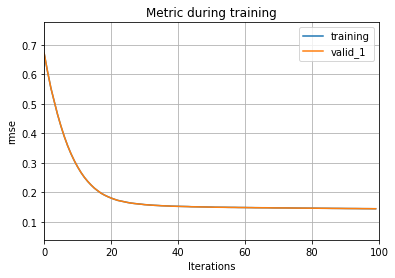

Plotting feature importances...


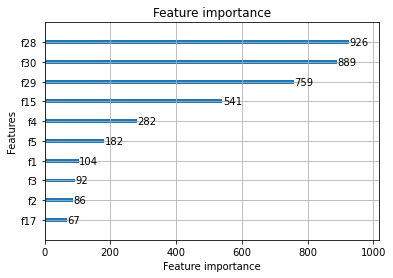

Plotting 4th tree...


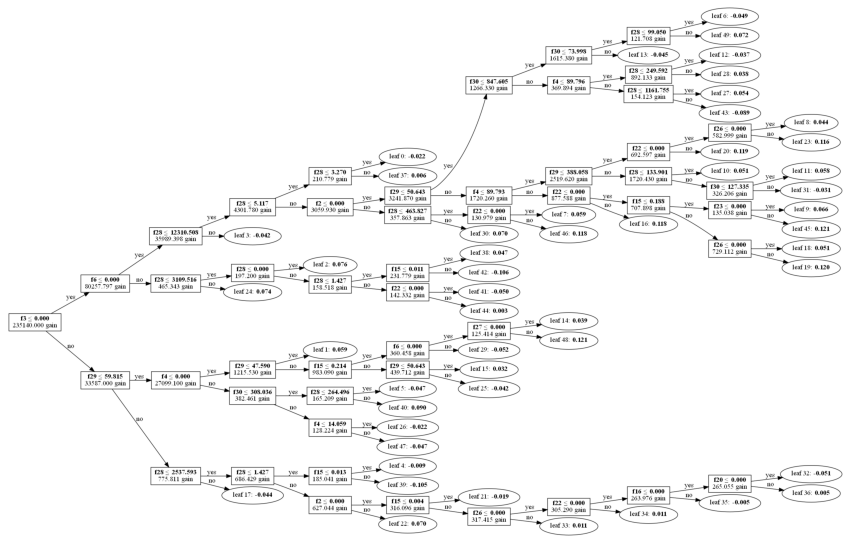

Plotting 4th tree with graphviz...
Save model...
Start predicting...
The RMSE of prediction is:
0.14398272563931344


In [15]:
from pathlib import Path

import pandas as pd

import lightgbm as lgb

if lgb.compat.MATPLOTLIB_INSTALLED:
    import matplotlib.pyplot as plt
else:
    raise ImportError('You need to install matplotlib and restart your session for plot_example.py.')

print('Loading data...')
X = TREE_2[columns]
y = TREE_2['TagValue_52']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'rmse', 'auc'},
    'max_depth': 10,
    'num_leaves': 50,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

evals_result = {}  # to record eval results for plotting

print('Starting training...')
# train
gbm = lgb.train(
    params,
    lgb_train,
    num_boost_round=100,
    valid_sets=[lgb_train, lgb_test],
    feature_name=[f'f{i + 1}' for i in range(X_train.shape[-1])],
    callbacks=[
        lgb.record_evaluation(evals_result)
    ]
)

print('Plotting metrics recorded during training...')#画出训练结果
ax = lgb.plot_metric(evals_result, metric='rmse')
plt.show()

print('Plotting feature importances...')#画特征重要性排序
ax = lgb.plot_importance(gbm, max_num_features=10)
plt.show()

# print('Plotting split value histogram...')
# ax = lgb.plot_split_value_histogram(gbm, feature='f24', bins='auto')
# plt.show()

print('Plotting 4th tree...')  # 画出决策树，其中的第4颗
ax = lgb.plot_tree(gbm, tree_index=3, figsize=(15, 15), show_info=['split_gain'])
plt.show()

print('Plotting 4th tree with graphviz...')#导出决策树的pdf图像到本地
graph = lgb.create_tree_digraph(gbm, tree_index=3, name='Tree4')
graph.render(view=True)


# 保存模型
print('Save model...')#保存模型
# 保存模型到文件中
gbm.save_model('model.txt')

print('Start predicting...')#开始预测
# 预测
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)#如果在训练期间启用了早期停止，可以通过best_iteration方式从最佳迭代中获得预测
# 评估
print('The RMSE of prediction is:')#预估结果的rmse
print(mean_squared_error(y_test, y_pred) ** 0.5)

In [16]:
X_test['y_pred'] = y_pred
right = TREE_2['CreateDateTime']
left = X_test
result = pd.merge(left, right, how='left', left_index=True, right_index=True)
result['y_test'] = y_test
result = result.sort_values(by=['CreateDateTime'])
result

,TagValue_85,TagValue_45,TagValue_13,TagValue_70,TagValue_72,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,...,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,deltatime_85_0,deltatime_85_1,deltatime_45_0,y_pred,CreateDateTime,y_test
12,1.0,1.0,0.0,0.000000,17.080690,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,353.862,53.440,1.828,4.058931,2020-08-05 00:12:31.272,3.935185
14,1.0,1.0,0.0,0.000000,16.040039,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,354.070,53.232,2.036,4.060468,2020-08-05 00:12:31.480,3.964120
15,1.0,1.0,0.0,0.000000,16.040039,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,354.082,53.220,2.048,4.062994,2020-08-05 00:12:31.492,3.935185
16,1.0,1.0,0.0,0.000000,15.002440,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,354.278,53.024,2.244,4.060468,2020-08-05 00:12:31.688,3.935185
18,1.0,1.0,0.0,0.000000,13.980100,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,354.493,52.809,2.459,4.062242,2020-08-05 00:12:31.903,3.964120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2748175,0.0,0.0,0.0,89.797974,0.000000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,463.395,20.268,463.394,2.678453,2020-08-19 23:57:14.637,2.864583
2748185,0.0,0.0,0.0,89.797974,0.000000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,468.746,14.917,468.745,2.677702,2020-08-19 23:57:19.988,2.662037
2748186,0.0,0.0,0.0,89.797974,0.000000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,468.953,14.710,468.952,2.676944,2020-08-19 23:57:20.195,2.633102
2748191,0.0,0.0,0.0,89.797974,0.000000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,471.385,12.278,471.384,2.674111,2020-08-19 23:57:22.627,2.633102


In [17]:
# def pred_test(y_pred,X_test,y_test):
#     X_test['y_pred'] = y_pred
#     right = TREE_2.set_index('timestamp')['CreateDateTime']
#     left = X_test
#     result = left.join(right, on='timestamp')
#     result['y_test'] = y_test
#     result = result.sort_values(by=['timestamp'])
#     return result

(1.5, 6.0)

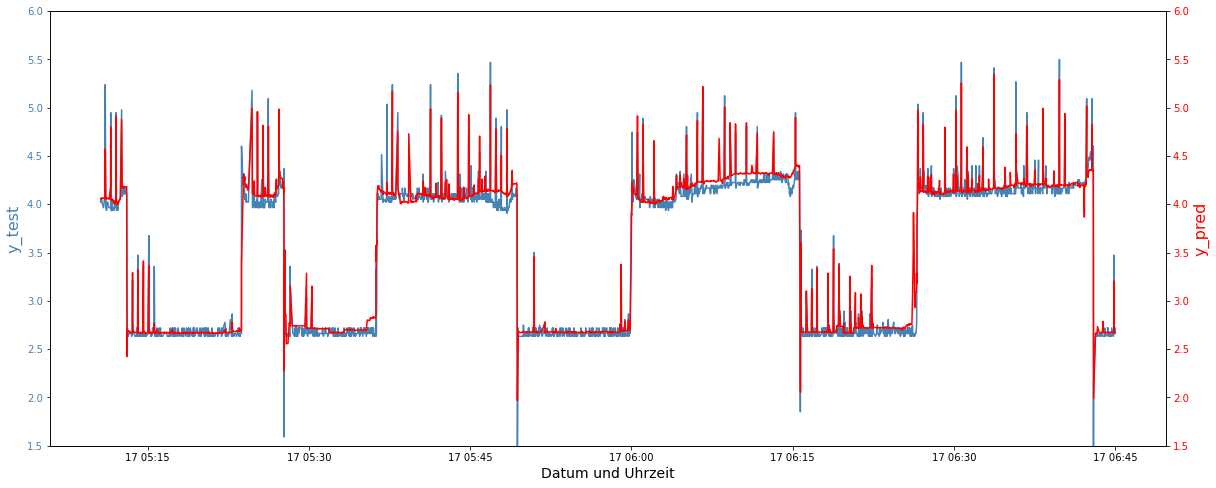

In [18]:
Daten_1=result


Daten_1=Daten_1[(Daten_1['CreateDateTime']>'2020-08-17 05:10:37')&(Daten_1['CreateDateTime']<'2020-08-17 06:45:00')]


fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('y_test', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.y_test, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
plt.ylim((1.5, 6))


#define second y-axis that shares x-axis with current plot


ax2 = ax.twinx()
#ax2 = ax.twiny()
#add second line to plot
ax2.set_ylabel('y_pred', color=col2, fontsize=16)
ax2.plot(Daten_1.CreateDateTime, Daten_1.y_pred, color=col2)
ax2.tick_params(axis='y', labelcolor=col2)
plt.ylim((1.5, 6))

In [44]:
columns = [col for col in TREE_2.columns if col not in ['CreateDateTime', 'TagValue_52']]
columns

['TagValue_85',
 'TagValue_45',
 'TagValue_13',
 'TagValue_70',
 'TagValue_72',
 'TagValue_86',
 'TagValue_133',
 'TagValue_134',
 'TagValue_135',
 'TagValue_136',
 'TagValue_137',
 'TagValue_138',
 'TagValue_139',
 'TagValue_140',
 'diff_float',
 'TagValue_133_lag1',
 'TagValue_133_lag2',
 'TagValue_134_lag1',
 'TagValue_134_lag2',
 'TagValue_135_lag1',
 'TagValue_135_lag2',
 'TagValue_136_lag1',
 'TagValue_136_lag2',
 'TagValue_137_lag1',
 'TagValue_137_lag2',
 'TagValue_138_lag1',
 'TagValue_138_lag2',
 'deltatime_85_0',
 'deltatime_85_1',
 'deltatime_45_0',
 'timestamp']

Loading data...
Starting training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.132701 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	training's auc: 0.820452	training's rmse: 0.671635	valid_1's auc: 0.824037	valid_1's rmse: 0.671881
[2]	training's auc: 0.992162	training's rmse: 0.609121	valid_1's auc: 0.998932	valid_1's rmse: 0.609356
[3]	training's auc: 0.992187	training's rmse: 0.552594	valid_1's auc: 0.998933	valid_1's rmse: 0.552787
[4]	training's auc: 0.989316	training's rmse: 0.504843	valid_1's auc: 0.999069	valid_1's rmse: 0.504979
[5]	training's auc: 0.989269	training's rmse: 0.459603	valid_1's auc: 0.999069	valid_1's rmse: 0.459719
[6]	training's auc: 0.989197	training's rmse: 0.419696	valid_1's auc: 0.999069	valid_1's rmse: 0.4198
[7]	training's auc: 0.989165	training's rmse: 0.384647	valid_1's auc: 0.999069	valid_1's rmse: 0.384722
[8]	trai

[77]	training's auc: 0.989416	training's rmse: 0.107397	valid_1's auc: 0.999089	valid_1's rmse: 0.106754
[78]	training's auc: 0.989416	training's rmse: 0.107305	valid_1's auc: 0.999089	valid_1's rmse: 0.106671
[79]	training's auc: 0.989415	training's rmse: 0.107118	valid_1's auc: 0.999087	valid_1's rmse: 0.106496
[80]	training's auc: 0.989417	training's rmse: 0.107039	valid_1's auc: 0.999087	valid_1's rmse: 0.106418
[81]	training's auc: 0.989413	training's rmse: 0.106721	valid_1's auc: 0.999087	valid_1's rmse: 0.106121
[82]	training's auc: 0.98941	training's rmse: 0.10635	valid_1's auc: 0.99908	valid_1's rmse: 0.10575
[83]	training's auc: 0.989409	training's rmse: 0.106111	valid_1's auc: 0.999079	valid_1's rmse: 0.105528
[84]	training's auc: 0.989409	training's rmse: 0.105955	valid_1's auc: 0.999079	valid_1's rmse: 0.105369
[85]	training's auc: 0.989408	training's rmse: 0.105826	valid_1's auc: 0.999084	valid_1's rmse: 0.105243
[86]	training's auc: 0.989408	training's rmse: 0.105657	val

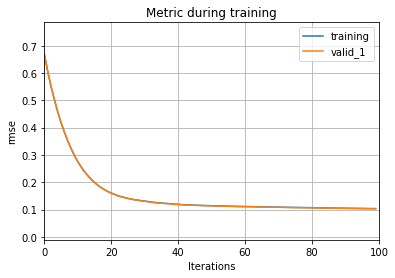

Plotting feature importances...


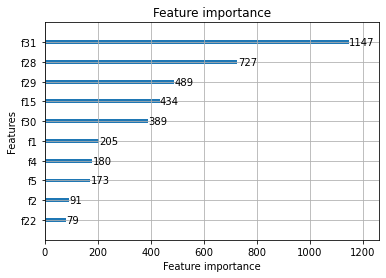

Plotting 4th tree...


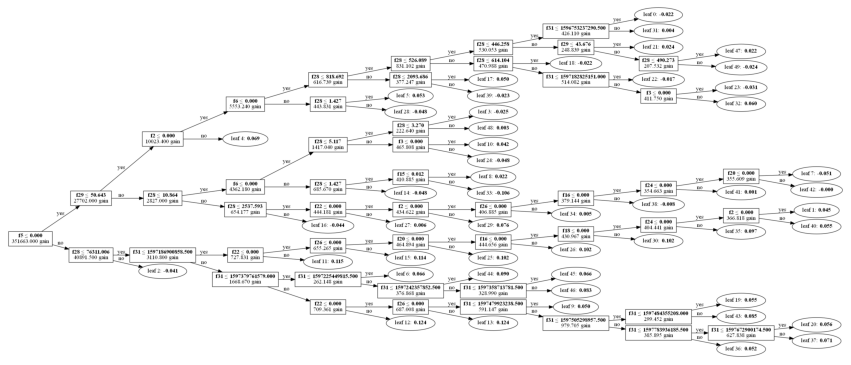

Plotting 4th tree with graphviz...
Save model...
Start predicting...
The RMSE of prediction is:
0.10285513690481349


In [45]:
from pathlib import Path

import pandas as pd

import lightgbm as lgb

if lgb.compat.MATPLOTLIB_INSTALLED:
    import matplotlib.pyplot as plt
else:
    raise ImportError('You need to install matplotlib and restart your session for plot_example.py.')

print('Loading data...')
X = TREE_2[columns]
y = TREE_2['TagValue_52']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'rmse', 'auc'},
    'max_depth': 10,
    'num_leaves': 50,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

evals_result = {}  # to record eval results for plotting

print('Starting training...')
# train
gbm = lgb.train(
    params,
    lgb_train,
    num_boost_round=100,
    valid_sets=[lgb_train, lgb_test],
    feature_name=[f'f{i + 1}' for i in range(X_train.shape[-1])],
    callbacks=[
        lgb.record_evaluation(evals_result)
    ]
)

print('Plotting metrics recorded during training...')#画出训练结果
ax = lgb.plot_metric(evals_result, metric='rmse')
plt.show()

print('Plotting feature importances...')#画特征重要性排序
ax = lgb.plot_importance(gbm, max_num_features=10)
plt.show()

# print('Plotting split value histogram...')
# ax = lgb.plot_split_value_histogram(gbm, feature='f24', bins='auto')
# plt.show()

print('Plotting 4th tree...')  # 画出决策树，其中的第4颗
ax = lgb.plot_tree(gbm, tree_index=3, figsize=(15, 15), show_info=['split_gain'])
plt.show()

print('Plotting 4th tree with graphviz...')#导出决策树的pdf图像到本地
graph = lgb.create_tree_digraph(gbm, tree_index=3, name='Tree4')
graph.render(view=True)


# 保存模型
print('Save model...')#保存模型
# 保存模型到文件中
gbm.save_model('model.txt')

print('Start predicting...')#开始预测
# 预测
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)#如果在训练期间启用了早期停止，可以通过best_iteration方式从最佳迭代中获得预测
# 评估
print('The RMSE of prediction is:')#预估结果的rmse
print(mean_squared_error(y_test, y_pred) ** 0.5)

In [ ]:
columns = [col for col in TREE_2.columns if col not in ['CreateDateTime_0','CreateDateTime', 'TagValue_52']]
X = TREE_2[columns]
y = TREE_2['TagValue_52']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


lgbm_train = lgbm.Dataset(X_train, y_train) # 将数据保存到LightGBM二进制文件将使加载更快
lgbm_eval = lgbm.Dataset(X_test, y_test, reference=lgbm_train)  # 创建验证数据
 
# 将参数写成字典下形式
params = {
    'task': 'train',
    'boosting_type': 'gbdt',  # 设置提升类型
    'objective': 'regression', # 目标函数
    'metric': {'l2', 'auc'},  # 评估函数
    'num_leaves': 31,   # 叶子节点数
    'learning_rate': 0.05,  # 学习速率
    'feature_fraction': 0.9, # 建树的特征选择比例
    'bagging_fraction': 0.8, # 建树的样本采样比例
    'bagging_freq': 5,  # k 意味着每 k 次迭代执行bagging
    'verbose': 1 # <0 显示致命的, =0 显示错误 (警告), >0 显示信息
}
 
print('Start training...')
# 训练 cv and train
gbm = lgbm.train(params,lgbm_train,num_boost_round=20,valid_sets=lgbm_eval,early_stopping_rounds=5) # 训练数据需要参数列表和数据集
 
print('Save model...') 
 
gbm.save_model('model.txt')   # 训练后保存模型到文件
 
print('Start predicting...')
# 预测数据集
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration) #如果在训练期间启用了早期停止，可以通过best_iteration方式从最佳迭代中获得预测
# 评估模型
# 计算真实值和预测值之间的均方根误差
print('The RMSE of prediction is:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [78]:
# coding: utf-8
import lightgbm as lgb
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# 加载数据
print('加载数据...')
columns = [col for col in TREE_2.columns if col not in ['CreateDateTime_0','CreateDateTime', 'TagValue_52']]
X = TREE_2[columns]
y = TREE_2['TagValue_52']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

print('开始训练...')
# 直接初始化LGBMRegressor
# 这个LightGBM的Regressor和sklearn中其他Regressor基本是一致的
gbm = lgb.LGBMRegressor(objective='regression',
                        num_leaves=31,
                        learning_rate=1,
                        n_estimators=40)

# 使用fit函数拟合
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=5)

# 预测
print('开始预测...')
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
# 评估预测结果
print('预测结果的rmse是:')
print(mean_squared_error(y_test, y_pred) ** 0.5)

加载数据...
(2097964, 25)
(2097964,)
(524491, 25)
(524491,)
开始训练...
[1]	valid_0's l1: 0.0937764	valid_0's l2: 0.027262
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 0.0815418	valid_0's l2: 0.0221893
[3]	valid_0's l1: 0.0737952	valid_0's l2: 0.0199905
[4]	valid_0's l1: 0.0720855	valid_0's l2: 0.0187992
[5]	valid_0's l1: 0.0695689	valid_0's l2: 0.017684
[6]	valid_0's l1: 0.069134	valid_0's l2: 0.0173789
[7]	valid_0's l1: 0.0669287	valid_0's l2: 0.0165086
[8]	valid_0's l1: 0.0657577	valid_0's l2: 0.0162092
[9]	valid_0's l1: 0.0649029	valid_0's l2: 0.015921
[10]	valid_0's l1: 0.0642325	valid_0's l2: 0.0157702
[11]	valid_0's l1: 0.0633758	valid_0's l2: 0.0153343
[12]	valid_0's l1: 0.0630277	valid_0's l2: 0.0151425
[13]	valid_0's l1: 0.0623661	valid_0's l2: 0.0148673
[14]	valid_0's l1: 0.0615063	valid_0's l2: 0.0146443
[15]	valid_0's l1: 0.0609528	valid_0's l2: 0.014506
[16]	valid_0's l1: 0.0607278	valid_0's l2: 0.0143914
[17]	valid_0's l1: 0.0599315	valid_0's l2:

In [14]:
# 配合scikit-learn的网格搜索交叉验证选择最优超参数
estimator = lgb.LGBMRegressor(num_leaves=31)

param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [20, 40]
}

gbm = GridSearchCV(estimator, param_grid)

gbm.fit(X_train, y_train)

print('用网格搜索找到的最优超参数为:')
print(gbm.best_params_)

用网格搜索找到的最优超参数为:
{'learning_rate': 1, 'n_estimators': 40}


In [73]:
#预测2020年9月份52号传感器压力值---1

In [74]:
#目标变量
TREE_3=pd.DataFrame()
# TREE_1.rename(columns = {'TagValue':'TagValue_52'}, inplace=True)

In [91]:
ID_85_2020

,CreateDateTime,TagValue,TagId
0,2020-02-06 13:05:56.982,0.0,85
1,2020-02-06 13:06:28.636,1.0,85
2,2020-02-06 13:08:47.160,0.0,85
3,2020-02-06 13:12:33.485,1.0,85
4,2020-02-06 13:21:29.363,0.0,85
...,...,...,...
25193,2020-12-18 23:28:07.454,0.0,85
25194,2020-12-18 23:32:33.546,1.0,85
25195,2020-12-18 23:40:17.384,0.0,85
25196,2020-12-18 23:54:41.608,1.0,85


In [112]:
TREE_3 = ID_85_2020[(ID_85_2020['CreateDateTime']>'2020-09-01 00:00:00')&(ID_85_2020['CreateDateTime']<'2020-10-01 00:00:00')]
TREE_3 = TREE_3.copy()
TREE_3.rename(columns = {'TagValue':'TagValue_85'}, inplace=True)
TREE_3

,CreateDateTime,TagValue_85,TagId
12965,2020-09-01 00:01:04.450,1.0,85
12966,2020-09-01 00:04:13.635,0.0,85
12967,2020-09-01 00:10:21.653,1.0,85
12968,2020-09-01 00:18:17.487,0.0,85
12969,2020-09-01 02:40:39.839,1.0,85
...,...,...,...
15233,2020-09-30 23:15:32.149,0.0,85
15234,2020-09-30 23:29:30.140,1.0,85
15235,2020-09-30 23:38:45.062,0.0,85
15236,2020-09-30 23:51:02.318,1.0,85


In [113]:
def zusammen_1(data,TREE_3):
    data = data[(data['CreateDateTime']>'2020-09-01 00:00:00')&(data['CreateDateTime']<'2020-10-01 00:00:00')]
    data = data.drop('TagId',axis = 1) 
    TREE_3 = TREE_3.set_index('CreateDateTime').join(data.set_index('CreateDateTime'),lsuffix = '_l', rsuffix = '_r',how = 'outer')
    TREE_3 = TREE_3.reset_index('CreateDateTime')
#     TREE_1 = TREE_1.fillna(method = "ffill")
    return TREE_3

In [114]:
# TREE_1 = zusammen(ID_85_2020,TREE_1)
# TREE_1.rename(columns = {'TagValue':'TagValue_85'}, inplace=True)
TREE_3 = zusammen_1(ID_45_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'TagValue_45'}, inplace=True)
TREE_3 = zusammen_1(ID_13_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'TagValue_13'}, inplace=True)
TREE_3 = zusammen_1(ID_70_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'TagValue_70'}, inplace=True)
TREE_3 = zusammen_1(ID_72_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'TagValue_72'}, inplace=True)
TREE_3 = zusammen_1(ID_86_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'TagValue_86'}, inplace=True)
TREE_3 = zusammen_1(ID_133_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'TagValue_133'}, inplace=True)
TREE_3 = zusammen_1(ID_134_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'TagValue_134'}, inplace=True)
TREE_3 = zusammen_1(ID_135_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'TagValue_135'}, inplace=True)
TREE_3 = zusammen_1(ID_136_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'TagValue_136'}, inplace=True)
TREE_3 = zusammen_1(ID_137_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'TagValue_137'}, inplace=True)
TREE_3 = zusammen_1(ID_138_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'TagValue_138'}, inplace=True)
TREE_3 = zusammen_1(ID_139_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'TagValue_139'}, inplace=True)
TREE_3 = zusammen_1(ID_140_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'TagValue_140'}, inplace=True)
TREE_3['TagValue_85'] = TREE_3['TagValue_85'].fillna(method = "ffill")
TREE_3['TagValue_86'] = TREE_3['TagValue_86'].fillna(method = "ffill")
TREE_3['TagValue_45'] = TREE_3['TagValue_45'].fillna(method = "ffill")
TREE_3['TagValue_13'] = TREE_3['TagValue_13'].fillna(method = "ffill")
TREE_3['TagValue_70'] = TREE_3['TagValue_70'].fillna(method = "ffill")
TREE_3['TagValue_72'] = TREE_3['TagValue_72'].fillna(method = "ffill")
TREE_3['TagValue_133'] = TREE_3['TagValue_133'].fillna(method = "ffill")
TREE_3['TagValue_134'] = TREE_3['TagValue_134'].fillna(method = "ffill")
TREE_3['TagValue_135'] = TREE_3['TagValue_135'].fillna(method = "ffill")
TREE_3['TagValue_136'] = TREE_3['TagValue_136'].fillna(method = "ffill")
TREE_3['TagValue_137'] = TREE_3['TagValue_137'].fillna(method = "ffill")
TREE_3['TagValue_138'] = TREE_3['TagValue_138'].fillna(method = "ffill")
TREE_3['TagValue_139'] = TREE_3['TagValue_139'].fillna(method = "ffill")
TREE_3['TagValue_140'] = TREE_3['TagValue_140'].fillna(method = "ffill")
TREE_3['diff_float'] = TREE_3['CreateDateTime'].diff().dt.total_seconds()
TREE_3

,CreateDateTime,TagValue_85,TagId,TagValue_45,TagValue_13,TagValue_70,TagValue_72,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,TagValue_137,TagValue_138,TagValue_139,TagValue_140,diff_float
0,2020-09-01 00:00:00.940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-09-01 00:00:01.369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.429
2,2020-09-01 00:00:31.386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,30.017
3,2020-09-01 00:00:31.777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.391
4,2020-09-01 00:01:01.808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,30.031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258447,2020-09-30 23:59:21.514,1.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.399
258448,2020-09-30 23:59:34.216,1.0,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.702
258449,2020-09-30 23:59:34.217,0.0,85.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001
258450,2020-09-30 23:59:51.598,0.0,NaN,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,17.381


In [115]:
TREE_3.loc[TREE_3['diff_float'] > 3600]

,CreateDateTime,TagValue_85,TagId,TagValue_45,TagValue_13,TagValue_70,TagValue_72,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,TagValue_137,TagValue_138,TagValue_139,TagValue_140,diff_float
366,2020-09-01 02:39:46.627,0.0,NaN,0.0,1.0,1.531982,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8313.579
7276,2020-09-01 16:32:41.417,0.0,NaN,0.0,1.0,0.292969,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15773.723
40673,2020-09-04 08:12:23.837,0.0,NaN,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93894.174
40675,2020-09-04 09:52:39.559,0.0,NaN,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5975.220
40677,2020-09-04 14:46:30.762,0.0,NaN,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17199.392
40687,2020-09-04 18:50:37.530,0.0,NaN,0.0,1.0,1.470947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11877.975
42383,2020-09-05 00:43:29.091,0.0,NaN,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13653.418
84794,2020-09-08 14:38:38.661,0.0,NaN,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115569.063
85637,2020-09-08 18:31:32.679,0.0,NaN,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8112.214
96719,2020-09-09 16:49:11.470,0.0,NaN,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23775.893


In [116]:
# def NaNjgtc(data):
# #     columns = [col for col in data.columns if col in ['CreateDateTime', 'TagValue_51', 'diff_float']]
# #     X = TREE_1[columns]
# #     X.isnull().sum()
# #     X.loc[(X['diff_float'] > 1800)]
#     data.loc[(data['diff_float'] > 1800),'TagValue_52'] = data.loc[(data['diff_float'] > 1800),'TagValue_52'].fillna(0)
# #     X.loc[(X['diff_float'] > 1800)]
# #     X.isnull().sum()
#     return data

In [117]:
# TREE_2 = NaNjgtc(TREE_1)
# TREE_2

In [118]:
TREE_3 = TREE_3.drop('TagId',axis = 1)
TREE_3['TagValue_133_lag1'] = TREE_3['TagValue_133'].shift(1)
TREE_3['TagValue_133_lag2'] = TREE_3['TagValue_133'].shift(2)
TREE_3['TagValue_134_lag1'] = TREE_3['TagValue_134'].shift(1)
TREE_3['TagValue_134_lag2'] = TREE_3['TagValue_134'].shift(2)
TREE_3['TagValue_135_lag1'] = TREE_3['TagValue_135'].shift(1)
TREE_3['TagValue_135_lag2'] = TREE_3['TagValue_135'].shift(2)
TREE_3['TagValue_136_lag1'] = TREE_3['TagValue_136'].shift(1)
TREE_3['TagValue_136_lag2'] = TREE_3['TagValue_136'].shift(2)
TREE_3['TagValue_137_lag1'] = TREE_3['TagValue_137'].shift(1)
TREE_3['TagValue_137_lag2'] = TREE_3['TagValue_137'].shift(2)
TREE_3['TagValue_138_lag1'] = TREE_3['TagValue_138'].shift(1)
TREE_3['TagValue_138_lag2'] = TREE_3['TagValue_138'].shift(2)

In [119]:
gh_1 = pd.DataFrame()
gh_1['CreateDateTime'] = ID_85_2020['CreateDateTime']
gh_1['CreateDateTime_85_0'] = ID_85_2020['CreateDateTime']
gh_1['CreateDateTime_85_1'] = ID_85_2020['CreateDateTime']
gh_1['TagValue'] = ID_85_2020['TagValue']
gh_1['TagId'] = ID_85_2020['TagId']
er_1 = pd.DataFrame()
er_1['CreateDateTime'] = ID_45_2020['CreateDateTime']
er_1['CreateDateTime_45_0'] = ID_45_2020['CreateDateTime']·
er_1['TagValue'] = ID_45_2020['TagValue']
er_1['TagId'] = ID_45_2020['TagId']

In [120]:
TREE_3 = zusammen_1(gh_1,TREE_3)
TREE_3['CreateDateTime_85_0'] = TREE_3['CreateDateTime_85_0'].fillna(method = "ffill")
TREE_3['CreateDateTime_85_1'] = TREE_3['CreateDateTime_85_1'].fillna(method = "bfill")
TREE_3['deltatime_85_0'] = TREE_3['CreateDateTime'] - TREE_3['CreateDateTime_85_0'] 
TREE_3['deltatime_85_0'] = TREE_3['deltatime_85_0'].dt.total_seconds()
TREE_3['deltatime_85_1'] = TREE_3['CreateDateTime_85_1'] - TREE_3['CreateDateTime'] 
TREE_3['deltatime_85_1'] = TREE_3['deltatime_85_1'].dt.total_seconds()
TREE_3 = TREE_3.drop('TagValue',axis = 1)
TREE_3 = TREE_3.drop('CreateDateTime_85_0',axis = 1)
TREE_3 = TREE_3.drop('CreateDateTime_85_1',axis = 1)
TREE_3 = zusammen_1(er_1,TREE_3)
TREE_3['CreateDateTime_45_0'] = TREE_3['CreateDateTime_45_0'].fillna(method = "ffill")
TREE_3['deltatime_45_0'] = TREE_3['CreateDateTime'] - TREE_3['CreateDateTime_45_0'] 
TREE_3['deltatime_45_0'] = TREE_3['deltatime_45_0'].dt.total_seconds()
TREE_3 = TREE_3.drop('TagValue',axis = 1)
TREE_3 = TREE_3.drop('CreateDateTime_45_0',axis = 1)
TREE_3=TREE_3.copy()
TREE_3['timestamp'] = TREE_3['CreateDateTime'].values.astype(np.int64) // 10 ** 6 

In [121]:
TREE_3.isnull().sum()

CreateDateTime           0
TagValue_85              6
TagValue_45              7
TagValue_13             68
TagValue_70            134
TagValue_72              8
TagValue_86          40673
TagValue_133             0
TagValue_134             2
TagValue_135             4
TagValue_136            59
TagValue_137            61
TagValue_138            63
TagValue_139           135
TagValue_140           164
diff_float               1
TagValue_133_lag1        1
TagValue_133_lag2        2
TagValue_134_lag1        3
TagValue_134_lag2        4
TagValue_135_lag1        5
TagValue_135_lag2        6
TagValue_136_lag1       60
TagValue_136_lag2       61
TagValue_137_lag1       62
TagValue_137_lag2       63
TagValue_138_lag1       64
TagValue_138_lag2       65
deltatime_85_0           6
deltatime_85_1           2
deltatime_45_0           7
timestamp                0
dtype: int64

In [122]:
TREE_3['TagValue_86'] = TREE_3['TagValue_86'].fillna(0)
TREE_3 = TREE_3.dropna()
TREE_3

,CreateDateTime,TagValue_85,TagValue_45,TagValue_13,TagValue_70,TagValue_72,TagValue_86,TagValue_133,TagValue_134,TagValue_135,...,TagValue_136_lag1,TagValue_136_lag2,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,deltatime_85_0,deltatime_85_1,deltatime_45_0,timestamp
164,2020-09-01 00:09:54.070,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,340.435,27.583,506.299,1598918994070
165,2020-09-01 00:09:54.483,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,340.848,27.170,506.712,1598918994483
166,2020-09-01 00:10:03.875,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,350.240,17.778,516.104,1598919003875
167,2020-09-01 00:10:04.077,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,350.442,17.576,516.306,1598919004077
168,2020-09-01 00:10:14.490,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,360.855,7.163,526.719,1598919014490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258445,2020-09-30 23:58:51.221,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,468.903,42.996,1206.158,1601510331221
258446,2020-09-30 23:59:21.115,1.0,0.0,1.0,0.000000,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,498.797,13.102,1236.052,1601510361115
258447,2020-09-30 23:59:21.514,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,499.196,12.703,1236.451,1601510361514
258448,2020-09-30 23:59:34.216,1.0,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,511.898,0.001,1249.153,1601510374216


In [123]:
TREE_3.isnull().sum()

CreateDateTime       0
TagValue_85          0
TagValue_45          0
TagValue_13          0
TagValue_70          0
TagValue_72          0
TagValue_86          0
TagValue_133         0
TagValue_134         0
TagValue_135         0
TagValue_136         0
TagValue_137         0
TagValue_138         0
TagValue_139         0
TagValue_140         0
diff_float           0
TagValue_133_lag1    0
TagValue_133_lag2    0
TagValue_134_lag1    0
TagValue_134_lag2    0
TagValue_135_lag1    0
TagValue_135_lag2    0
TagValue_136_lag1    0
TagValue_136_lag2    0
TagValue_137_lag1    0
TagValue_137_lag2    0
TagValue_138_lag1    0
TagValue_138_lag2    0
deltatime_85_0       0
deltatime_85_1       0
deltatime_45_0       0
timestamp            0
dtype: int64

In [124]:
TREE_3 = TREE_3.reset_index(drop=True)
TREE_3

,CreateDateTime,TagValue_85,TagValue_45,TagValue_13,TagValue_70,TagValue_72,TagValue_86,TagValue_133,TagValue_134,TagValue_135,...,TagValue_136_lag1,TagValue_136_lag2,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,deltatime_85_0,deltatime_85_1,deltatime_45_0,timestamp
0,2020-09-01 00:09:54.070,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,340.435,27.583,506.299,1598918994070
1,2020-09-01 00:09:54.483,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,340.848,27.170,506.712,1598918994483
2,2020-09-01 00:10:03.875,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,350.240,17.778,516.104,1598919003875
3,2020-09-01 00:10:04.077,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,350.442,17.576,516.306,1598919004077
4,2020-09-01 00:10:14.490,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,360.855,7.163,526.719,1598919014490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258281,2020-09-30 23:58:51.221,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,468.903,42.996,1206.158,1601510331221
258282,2020-09-30 23:59:21.115,1.0,0.0,1.0,0.000000,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,498.797,13.102,1236.052,1601510361115
258283,2020-09-30 23:59:21.514,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,499.196,12.703,1236.451,1601510361514
258284,2020-09-30 23:59:34.216,1.0,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,511.898,0.001,1249.153,1601510374216


In [125]:
X_test_09 = TREE_3.drop('timestamp',axis = 1)
X_test_09 = X_test_09.drop('CreateDateTime',axis = 1)
X_test_09

,TagValue_85,TagValue_45,TagValue_13,TagValue_70,TagValue_72,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,...,TagValue_135_lag2,TagValue_136_lag1,TagValue_136_lag2,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,deltatime_85_0,deltatime_85_1,deltatime_45_0
0,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,340.435,27.583,506.299
1,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,340.848,27.170,506.712
2,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,350.240,17.778,516.104
3,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,350.442,17.576,516.306
4,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,360.855,7.163,526.719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258281,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,468.903,42.996,1206.158
258282,1.0,0.0,1.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,498.797,13.102,1236.052
258283,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,499.196,12.703,1236.451
258284,1.0,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,511.898,0.001,1249.153


In [141]:
y_pred_09 = gbm.predict(X_test_09, num_iteration=gbm.best_iteration)

In [142]:
y_pred_09

array([2.68702887, 2.68046779, 2.77008363, ..., 4.68277542, 4.14647996,
       4.13714628])

In [144]:
X_test_09['y_pred_09'] = y_pred_09
right = TREE_3['CreateDateTime']
left = X_test_09
result = pd.merge(left, right, how='left', left_index=True, right_index=True)
# result['y_test'] = TREE_3['TagValue_52']
result = result.sort_values(by=['CreateDateTime'])
result

,TagValue_85,TagValue_45,TagValue_13,TagValue_70,TagValue_72,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,...,TagValue_136_lag2,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,deltatime_85_0,deltatime_85_1,deltatime_45_0,y_pred_09,CreateDateTime
0,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,340.435,27.583,506.299,2.687029,2020-09-01 00:09:54.070
1,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,340.848,27.170,506.712,2.680468,2020-09-01 00:09:54.483
2,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,350.240,17.778,516.104,2.770084,2020-09-01 00:10:03.875
3,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,350.442,17.576,516.306,3.174394,2020-09-01 00:10:04.077
4,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,360.855,7.163,526.719,2.801549,2020-09-01 00:10:14.490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258281,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,468.903,42.996,1206.158,4.751166,2020-09-30 23:58:51.221
258282,1.0,0.0,1.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,498.797,13.102,1236.052,4.300545,2020-09-30 23:59:21.115
258283,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,499.196,12.703,1236.451,4.682775,2020-09-30 23:59:21.514
258284,1.0,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,511.898,0.001,1249.153,4.146480,2020-09-30 23:59:34.216


(1.5, 6.0)

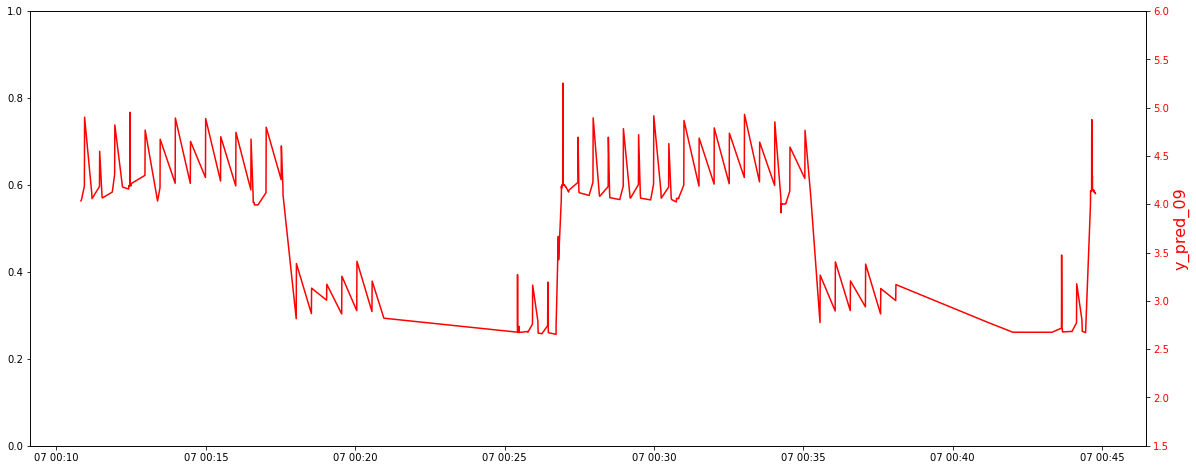

In [145]:
Daten_1=result
Daten_1=Daten_1[(Daten_1['CreateDateTime']>'2020-09-07 00:10:37')&(Daten_1['CreateDateTime']<'2020-09-07 00:45:00')]


fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


# ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
# ax.set_ylabel('y_test', color=col1, fontsize=16)
# ax.plot(Daten_1.CreateDateTime, Daten_1.y_test, color=col1)
# ax.tick_params(axis='y', labelcolor=col1)
# plt.ylim((1.5, 6))


#define second y-axis that shares x-axis with current plot


ax2 = ax.twinx()
#ax2 = ax.twiny()
#add second line to plot
ax2.set_ylabel('y_pred_09', color=col2, fontsize=16)
ax2.plot(Daten_1.CreateDateTime, Daten_1.y_pred_09, color=col2)
ax2.tick_params(axis='y', labelcolor=col2)
plt.ylim((1.5, 6))

In [23]:
ID_52_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_052_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')


(1.5, 6.0)

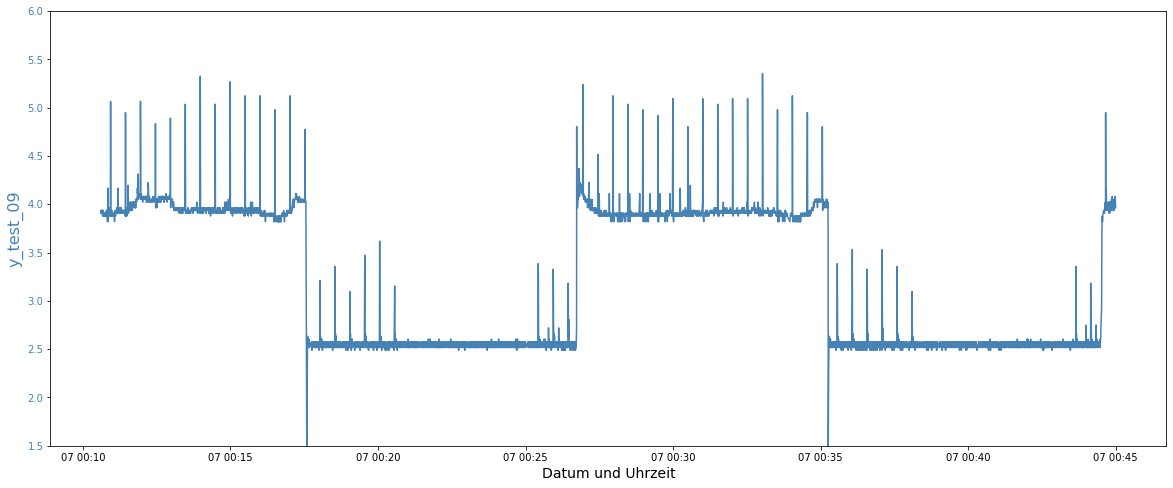

In [147]:
Daten_1=ID_52_2020
Daten_1=Daten_1[(Daten_1['CreateDateTime']>'2020-09-07 00:10:37')&(Daten_1['CreateDateTime']<'2020-09-07 00:45:00')]


fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('y_test_09', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.TagValue, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
plt.ylim((1.5, 6))


#define second y-axis that shares x-axis with current plot


# ax2 = ax.twinx()
# #ax2 = ax.twiny()
# #add second line to plot
# ax2.set_ylabel('y_pred_09', color=col2, fontsize=16)
# ax2.plot(Daten_1.CreateDateTime, Daten_1.y_pred_09, color=col2)
# ax2.tick_params(axis='y', labelcolor=col2)
# plt.ylim((1.5, 6))

In [94]:
#预测2020年9月份52号传感器压力值---2

In [17]:
#目标变量
TREE_4=pd.DataFrame()
TREE_4 = ID_52_2020[(ID_52_2020['CreateDateTime']>'2020-09-01 00:00:00')&(ID_52_2020['CreateDateTime']<'2020-10-01 00:00:00')]
TREE_4 = TREE_4.copy()
TREE_4.rename(columns = {'TagValue':'TagValue_52'}, inplace=True)

In [18]:
def zusammen_2(data,TREE_4):
    data = data[(data['CreateDateTime']>'2020-09-01 00:00:00')&(data['CreateDateTime']<'2020-10-01 00:00:00')]
    data = data.drop('TagId',axis = 1) 
    TREE_4 = TREE_4.set_index('CreateDateTime').join(data.set_index('CreateDateTime'),lsuffix = '_l', rsuffix = '_r',how = 'outer')
    TREE_4 = TREE_4.reset_index('CreateDateTime')
#     TREE_1 = TREE_1.fillna(method = "ffill")
    return TREE_4

In [19]:
TREE_4 = zusammen_2(ID_85_2020,TREE_4)
TREE_4.rename(columns = {'TagValue':'TagValue_85'}, inplace=True)
TREE_4 = zusammen_2(ID_45_2020,TREE_4)
TREE_4.rename(columns = {'TagValue':'TagValue_45'}, inplace=True)
TREE_4 = zusammen_2(ID_13_2020,TREE_4)
TREE_4.rename(columns = {'TagValue':'TagValue_13'}, inplace=True)
TREE_4 = zusammen_2(ID_70_2020,TREE_4)
TREE_4.rename(columns = {'TagValue':'TagValue_70'}, inplace=True)
TREE_4 = zusammen_2(ID_72_2020,TREE_4)
TREE_4.rename(columns = {'TagValue':'TagValue_72'}, inplace=True)
TREE_4 = zusammen_2(ID_86_2020,TREE_4)
TREE_4.rename(columns = {'TagValue':'TagValue_86'}, inplace=True)
TREE_4 = zusammen_2(ID_133_2020,TREE_4)
TREE_4.rename(columns = {'TagValue':'TagValue_133'}, inplace=True)
TREE_4 = zusammen_2(ID_134_2020,TREE_4)
TREE_4.rename(columns = {'TagValue':'TagValue_134'}, inplace=True)
TREE_4 = zusammen_2(ID_135_2020,TREE_4)
TREE_4.rename(columns = {'TagValue':'TagValue_135'}, inplace=True)
TREE_4 = zusammen_2(ID_136_2020,TREE_4)
TREE_4.rename(columns = {'TagValue':'TagValue_136'}, inplace=True)
TREE_4 = zusammen_2(ID_137_2020,TREE_4)
TREE_4.rename(columns = {'TagValue':'TagValue_137'}, inplace=True)
TREE_4 = zusammen_2(ID_138_2020,TREE_4)
TREE_4.rename(columns = {'TagValue':'TagValue_138'}, inplace=True)
TREE_4 = zusammen_2(ID_139_2020,TREE_4)
TREE_4.rename(columns = {'TagValue':'TagValue_139'}, inplace=True)
TREE_4 = zusammen_2(ID_140_2020,TREE_4)
TREE_4.rename(columns = {'TagValue':'TagValue_140'}, inplace=True)
TREE_4['TagValue_85'] = TREE_4['TagValue_85'].fillna(method = "ffill")
TREE_4['TagValue_86'] = TREE_4['TagValue_86'].fillna(method = "ffill")
TREE_4['TagValue_45'] = TREE_4['TagValue_45'].fillna(method = "ffill")
TREE_4['TagValue_13'] = TREE_4['TagValue_13'].fillna(method = "ffill")
TREE_4['TagValue_70'] = TREE_4['TagValue_70'].fillna(method = "ffill")
TREE_4['TagValue_72'] = TREE_4['TagValue_72'].fillna(method = "ffill")
TREE_4['TagValue_133'] = TREE_4['TagValue_133'].fillna(method = "ffill")
TREE_4['TagValue_134'] = TREE_4['TagValue_134'].fillna(method = "ffill")
TREE_4['TagValue_135'] = TREE_4['TagValue_135'].fillna(method = "ffill")
TREE_4['TagValue_136'] = TREE_4['TagValue_136'].fillna(method = "ffill")
TREE_4['TagValue_137'] = TREE_4['TagValue_137'].fillna(method = "ffill")
TREE_4['TagValue_138'] = TREE_4['TagValue_138'].fillna(method = "ffill")
TREE_4['TagValue_139'] = TREE_4['TagValue_139'].fillna(method = "ffill")
TREE_4['TagValue_140'] = TREE_4['TagValue_140'].fillna(method = "ffill")
TREE_4['diff_float'] = TREE_4['CreateDateTime'].diff().dt.total_seconds()
TREE_4

,CreateDateTime,TagValue_52,TagId,TagValue_85,TagValue_45,TagValue_13,TagValue_70,TagValue_72,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,TagValue_137,TagValue_138,TagValue_139,TagValue_140,diff_float
0,2020-09-01 00:00:00.545,2.604167,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-09-01 00:00:00.754,2.575232,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.209
2,2020-09-01 00:00:00.940,3.096065,52.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.186
3,2020-09-01 00:00:01.158,3.298611,52.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.218
4,2020-09-01 00:00:01.369,3.096065,52.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4026175,2020-09-30 23:59:55.472,2.604167,52.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.398
4026176,2020-09-30 23:59:58.136,2.633102,52.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.664
4026177,2020-09-30 23:59:58.342,2.604167,52.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.206
4026178,2020-09-30 23:59:59.373,2.633102,52.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.031


In [20]:
TREE_4.isnull().sum()

CreateDateTime         0
TagValue_52       227352
TagId             227352
TagValue_85          169
TagValue_45          204
TagValue_13          564
TagValue_70         1532
TagValue_72          205
TagValue_86       650356
TagValue_133           2
TagValue_134          76
TagValue_135         156
TagValue_136         316
TagValue_137         416
TagValue_138         492
TagValue_139        1533
TagValue_140        1625
diff_float             1
dtype: int64

In [21]:
TREE_4['TagValue_86'] = TREE_4['TagValue_86'].fillna(0)
TREE_4.isnull().sum()

CreateDateTime         0
TagValue_52       227352
TagId             227352
TagValue_85          169
TagValue_45          204
TagValue_13          564
TagValue_70         1532
TagValue_72          205
TagValue_86            0
TagValue_133           2
TagValue_134          76
TagValue_135         156
TagValue_136         316
TagValue_137         416
TagValue_138         492
TagValue_139        1533
TagValue_140        1625
diff_float             1
dtype: int64

In [22]:
TREE_4.loc[TREE_4['diff_float'] > 3600]

,CreateDateTime,TagValue_52,TagId,TagValue_85,TagValue_45,TagValue_13,TagValue_70,TagValue_72,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,TagValue_137,TagValue_138,TagValue_139,TagValue_140,diff_float
2050749,2020-09-21 09:35:13.059,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,780593.443


In [23]:
def NaNjgtc(data):
#     columns = [col for col in data.columns if col in ['CreateDateTime', 'TagValue_51', 'diff_float']]
#     X = TREE_1[columns]
#     X.isnull().sum()
#     X.loc[(X['diff_float'] > 1800)]
    data.loc[(data['diff_float'] > 3600),'TagValue_52'] = data.loc[(data['diff_float'] > 3600),'TagValue_52'].fillna(0)
#     X.loc[(X['diff_float'] > 1800)]
#     X.isnull().sum()
    return data

In [24]:
TREE_4 = NaNjgtc(TREE_4)
TREE_4

,CreateDateTime,TagValue_52,TagId,TagValue_85,TagValue_45,TagValue_13,TagValue_70,TagValue_72,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,TagValue_137,TagValue_138,TagValue_139,TagValue_140,diff_float
0,2020-09-01 00:00:00.545,2.604167,52.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-09-01 00:00:00.754,2.575232,52.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.209
2,2020-09-01 00:00:00.940,3.096065,52.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.186
3,2020-09-01 00:00:01.158,3.298611,52.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.218
4,2020-09-01 00:00:01.369,3.096065,52.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4026175,2020-09-30 23:59:55.472,2.604167,52.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.398
4026176,2020-09-30 23:59:58.136,2.633102,52.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.664
4026177,2020-09-30 23:59:58.342,2.604167,52.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.206
4026178,2020-09-30 23:59:59.373,2.633102,52.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.031


In [25]:
TREE_4['TagValue_52'] = TREE_4['TagValue_52'].fillna(method = "ffill")
TREE_4 = TREE_4.drop('TagId',axis = 1)
TREE_4['TagValue_133_lag1'] = TREE_4['TagValue_133'].shift(1)
TREE_4['TagValue_133_lag2'] = TREE_4['TagValue_133'].shift(2)
TREE_4['TagValue_134_lag1'] = TREE_4['TagValue_134'].shift(1)
TREE_4['TagValue_134_lag2'] = TREE_4['TagValue_134'].shift(2)
TREE_4['TagValue_135_lag1'] = TREE_4['TagValue_135'].shift(1)
TREE_4['TagValue_135_lag2'] = TREE_4['TagValue_135'].shift(2)
TREE_4['TagValue_136_lag1'] = TREE_4['TagValue_136'].shift(1)
TREE_4['TagValue_136_lag2'] = TREE_4['TagValue_136'].shift(2)
TREE_4['TagValue_137_lag1'] = TREE_4['TagValue_137'].shift(1)
TREE_4['TagValue_137_lag2'] = TREE_4['TagValue_137'].shift(2)
TREE_4['TagValue_138_lag1'] = TREE_4['TagValue_138'].shift(1)
TREE_4['TagValue_138_lag2'] = TREE_4['TagValue_138'].shift(2)

In [26]:
gh_2 = pd.DataFrame()
gh_2['CreateDateTime'] = ID_85_2020['CreateDateTime']
gh_2['CreateDateTime_85_0'] = ID_85_2020['CreateDateTime']
gh_2['CreateDateTime_85_1'] = ID_85_2020['CreateDateTime']
gh_2['TagValue'] = ID_85_2020['TagValue']
gh_2['TagId'] = ID_85_2020['TagId']
er_2 = pd.DataFrame()
er_2['CreateDateTime'] = ID_45_2020['CreateDateTime']
er_2['CreateDateTime_45_0'] = ID_45_2020['CreateDateTime']
er_2['TagValue'] = ID_45_2020['TagValue']
er_2['TagId'] = ID_45_2020['TagId']

In [27]:
TREE_4 = zusammen_2(gh_2,TREE_4)
TREE_4['CreateDateTime_85_0'] = TREE_4['CreateDateTime_85_0'].fillna(method = "ffill")
TREE_4['CreateDateTime_85_1'] = TREE_4['CreateDateTime_85_1'].fillna(method = "bfill")
TREE_4['deltatime_85_0'] = TREE_4['CreateDateTime'] - TREE_4['CreateDateTime_85_0'] 
TREE_4['deltatime_85_0'] = TREE_4['deltatime_85_0'].dt.total_seconds()
TREE_4['deltatime_85_1'] = TREE_4['CreateDateTime_85_1'] - TREE_4['CreateDateTime'] 
TREE_4['deltatime_85_1'] = TREE_4['deltatime_85_1'].dt.total_seconds()
TREE_4 = TREE_4.drop('TagValue',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_85_0',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_85_1',axis = 1)
TREE_4 = zusammen_2(er_2,TREE_4)
TREE_4['CreateDateTime_45_0'] = TREE_4['CreateDateTime_45_0'].fillna(method = "ffill")
TREE_4['deltatime_45_0'] = TREE_4['CreateDateTime'] - TREE_4['CreateDateTime_45_0'] 
TREE_4['deltatime_45_0'] = TREE_4['deltatime_45_0'].dt.total_seconds()
TREE_4 = TREE_4.drop('TagValue',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_45_0',axis = 1)
TREE_4=TREE_4.copy()
TREE_4['timestamp'] = TREE_4['CreateDateTime'].values.astype(np.int64) // 10 ** 6 
TREE_4

,CreateDateTime,TagValue_52,TagValue_85,TagValue_45,TagValue_13,TagValue_70,TagValue_72,TagValue_86,TagValue_133,TagValue_134,...,TagValue_136_lag1,TagValue_136_lag2,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,deltatime_85_0,deltatime_85_1,deltatime_45_0,timestamp
0,2020-09-01 00:00:00.545,2.604167,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.905,NaN,1598918400545
1,2020-09-01 00:00:00.754,2.575232,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.696,NaN,1598918400754
2,2020-09-01 00:00:00.940,3.096065,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.510,NaN,1598918400940
3,2020-09-01 00:00:01.158,3.298611,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.292,NaN,1598918401158
4,2020-09-01 00:00:01.369,3.096065,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.081,NaN,1598918401369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4026175,2020-09-30 23:59:55.472,2.604167,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,21.255,NaN,1270.409,1601510395472
4026176,2020-09-30 23:59:58.136,2.633102,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,23.919,NaN,1273.073,1601510398136
4026177,2020-09-30 23:59:58.342,2.604167,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,24.125,NaN,1273.279,1601510398342
4026178,2020-09-30 23:59:59.373,2.633102,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,25.156,NaN,1274.310,1601510399373


In [28]:
TREE_4.isnull().sum()

CreateDateTime          0
TagValue_52             0
TagValue_85           169
TagValue_45           204
TagValue_13           564
TagValue_70          1532
TagValue_72           205
TagValue_86             0
TagValue_133            2
TagValue_134           76
TagValue_135          156
TagValue_136          316
TagValue_137          416
TagValue_138          492
TagValue_139         1533
TagValue_140         1625
diff_float              1
TagValue_133_lag1       3
TagValue_133_lag2       4
TagValue_134_lag1      77
TagValue_134_lag2      78
TagValue_135_lag1     157
TagValue_135_lag2     158
TagValue_136_lag1     317
TagValue_136_lag2     318
TagValue_137_lag1     417
TagValue_137_lag2     418
TagValue_138_lag1     493
TagValue_138_lag2     494
deltatime_85_0        169
deltatime_85_1         66
deltatime_45_0        204
timestamp               0
dtype: int64

In [29]:
TREE_4 = TREE_4.dropna()
TREE_4

,CreateDateTime,TagValue_52,TagValue_85,TagValue_45,TagValue_13,TagValue_70,TagValue_72,TagValue_86,TagValue_133,TagValue_134,...,TagValue_136_lag1,TagValue_136_lag2,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,deltatime_85_0,deltatime_85_1,deltatime_45_0,timestamp
1625,2020-09-01 00:09:54.070,2.575232,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,340.435,27.583,506.299,1598918994070
1626,2020-09-01 00:09:54.286,2.777778,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,340.651,27.367,506.515,1598918994286
1627,2020-09-01 00:09:54.483,2.777778,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,340.848,27.170,506.712,1598918994483
1628,2020-09-01 00:09:54.493,2.806713,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,340.858,27.160,506.722,1598918994493
1629,2020-09-01 00:09:54.694,2.777778,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,341.059,26.959,506.923,1598918994694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4026109,2020-09-30 23:59:32.600,4.195602,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,510.282,1.617,1247.537,1601510372600
4026110,2020-09-30 23:59:33.013,4.166667,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,510.695,1.204,1247.950,1601510373013
4026111,2020-09-30 23:59:33.211,4.195602,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,510.893,1.006,1248.148,1601510373211
4026112,2020-09-30 23:59:34.216,4.195602,1.0,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,511.898,0.001,1249.153,1601510374216


In [30]:
TREE_4.isnull().sum()

CreateDateTime       0
TagValue_52          0
TagValue_85          0
TagValue_45          0
TagValue_13          0
TagValue_70          0
TagValue_72          0
TagValue_86          0
TagValue_133         0
TagValue_134         0
TagValue_135         0
TagValue_136         0
TagValue_137         0
TagValue_138         0
TagValue_139         0
TagValue_140         0
diff_float           0
TagValue_133_lag1    0
TagValue_133_lag2    0
TagValue_134_lag1    0
TagValue_134_lag2    0
TagValue_135_lag1    0
TagValue_135_lag2    0
TagValue_136_lag1    0
TagValue_136_lag2    0
TagValue_137_lag1    0
TagValue_137_lag2    0
TagValue_138_lag1    0
TagValue_138_lag2    0
deltatime_85_0       0
deltatime_85_1       0
deltatime_45_0       0
timestamp            0
dtype: int64

In [31]:
TREE_4 = TREE_4.reset_index(drop=True)
TREE_4

,CreateDateTime,TagValue_52,TagValue_85,TagValue_45,TagValue_13,TagValue_70,TagValue_72,TagValue_86,TagValue_133,TagValue_134,...,TagValue_136_lag1,TagValue_136_lag2,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,deltatime_85_0,deltatime_85_1,deltatime_45_0,timestamp
0,2020-09-01 00:09:54.070,2.575232,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,340.435,27.583,506.299,1598918994070
1,2020-09-01 00:09:54.286,2.777778,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,340.651,27.367,506.515,1598918994286
2,2020-09-01 00:09:54.483,2.777778,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,340.848,27.170,506.712,1598918994483
3,2020-09-01 00:09:54.493,2.806713,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,340.858,27.160,506.722,1598918994493
4,2020-09-01 00:09:54.694,2.777778,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,341.059,26.959,506.923,1598918994694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024484,2020-09-30 23:59:32.600,4.195602,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,510.282,1.617,1247.537,1601510372600
4024485,2020-09-30 23:59:33.013,4.166667,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,510.695,1.204,1247.950,1601510373013
4024486,2020-09-30 23:59:33.211,4.195602,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,510.893,1.006,1248.148,1601510373211
4024487,2020-09-30 23:59:34.216,4.195602,1.0,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,511.898,0.001,1249.153,1601510374216


In [46]:
X_test_09_2 = TREE_4.drop('CreateDateTime',axis = 1)
X_test_09_2 = X_test_09_2.drop('TagValue_52',axis = 1)
X_test_09_2

,TagValue_85,TagValue_45,TagValue_13,TagValue_70,TagValue_72,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,...,TagValue_136_lag1,TagValue_136_lag2,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,deltatime_85_0,deltatime_85_1,deltatime_45_0,timestamp
0,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,340.435,27.583,506.299,1598918994070
1,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,340.651,27.367,506.515,1598918994286
2,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,340.848,27.170,506.712,1598918994483
3,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,340.858,27.160,506.722,1598918994493
4,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,341.059,26.959,506.923,1598918994694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024484,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,510.282,1.617,1247.537,1601510372600
4024485,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,510.695,1.204,1247.950,1601510373013
4024486,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,510.893,1.006,1248.148,1601510373211
4024487,1.0,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,511.898,0.001,1249.153,1601510374216


In [47]:
y_pred_09_2 = gbm.predict(X_test_09_2, num_iteration=gbm.best_iteration)

In [48]:
y_pred_09_2

array([2.74092252, 2.76989667, 2.67746195, ..., 4.14968992, 4.00473729,
       4.10777244])

In [50]:
X_test_09_2['y_pred_09_2'] = y_pred_09_2
right = TREE_4.set_index('timestamp')['CreateDateTime']
left = X_test_09_2
result = left.join(right, on='timestamp')
result = result.sort_values(by=['timestamp'])
result['y_test'] = TREE_4['TagValue_52']
result

,TagValue_85,TagValue_45,TagValue_13,TagValue_70,TagValue_72,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,...,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,deltatime_85_0,deltatime_85_1,deltatime_45_0,timestamp,y_pred_09_2,CreateDateTime,y_test
0,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,340.435,27.583,506.299,1598918994070,2.740923,2020-09-01 00:09:54.070,2.575232
1,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,340.651,27.367,506.515,1598918994286,2.769897,2020-09-01 00:09:54.286,2.777778
2,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,340.848,27.170,506.712,1598918994483,2.677462,2020-09-01 00:09:54.483,2.777778
3,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,340.858,27.160,506.722,1598918994493,2.715907,2020-09-01 00:09:54.493,2.806713
4,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,341.059,26.959,506.923,1598918994694,2.674206,2020-09-01 00:09:54.694,2.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024484,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,510.282,1.617,1247.537,1601510372600,4.149690,2020-09-30 23:59:32.600,4.195602
4024485,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,510.695,1.204,1247.950,1601510373013,4.153498,2020-09-30 23:59:33.013,4.166667
4024486,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,510.893,1.006,1248.148,1601510373211,4.149690,2020-09-30 23:59:33.211,4.195602
4024487,1.0,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,511.898,0.001,1249.153,1601510374216,4.004737,2020-09-30 23:59:34.216,4.195602


(1.5, 6.0)

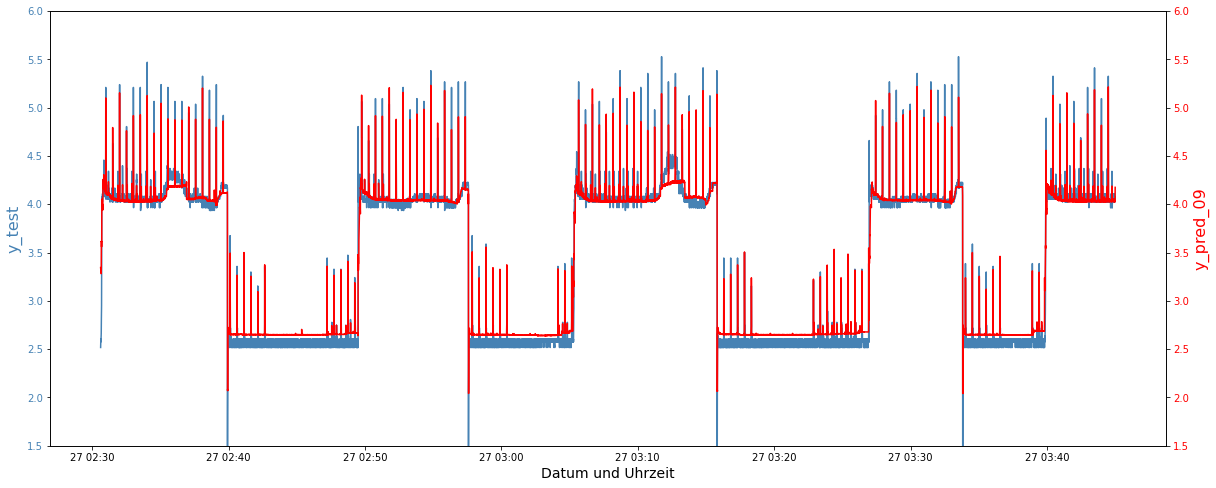

In [51]:
Daten_1=result
Daten_1=Daten_1[(Daten_1['CreateDateTime']>'2020-09-27 02:30:37')&(Daten_1['CreateDateTime']<'2020-09-27 03:45:00')]


fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('y_test', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.y_test, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
plt.ylim((1.5, 6))


#define second y-axis that shares x-axis with current plot


ax2 = ax.twinx()
#ax2 = ax.twiny()
#add second line to plot
ax2.set_ylabel('y_pred_09', color=col2, fontsize=16)
ax2.plot(Daten_1.CreateDateTime, Daten_1.y_pred_09_2, color=col2)
ax2.tick_params(axis='y', labelcolor=col2)
plt.ylim((1.5, 6))

In [52]:
print('预测结果的rmse是:')
print(mean_squared_error(result['y_test'], y_pred_09_2) ** 0.5)

预测结果的rmse是:
0.17658628095081633


(1.5, 6.0)

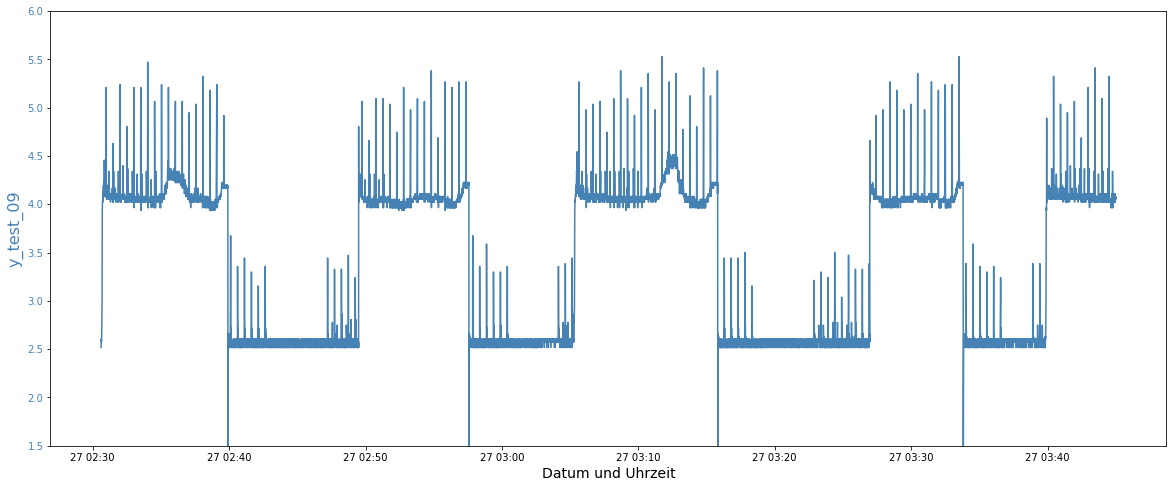

In [134]:
Daten_1=ID_52_2020
Daten_1=Daten_1[(Daten_1['CreateDateTime']>'2020-09-27 02:30:37')&(Daten_1['CreateDateTime']<'2020-09-27 03:45:00')]


fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('y_test_09', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.TagValue, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
plt.ylim((1.5, 6))


#define second y-axis that shares x-axis with current plot


# ax2 = ax.twinx()
# #ax2 = ax.twiny()
# #add second line to plot
# ax2.set_ylabel('y_pred_09', color=col2, fontsize=16)
# ax2.plot(Daten_1.CreateDateTime, Daten_1.y_pred_09, color=col2)
# ax2.tick_params(axis='y', labelcolor=col2)
# plt.ylim((1.5, 6))

In [32]:
X_test_09_3 = TREE_4.drop('CreateDateTime',axis = 1)
X_test_09_3 = X_test_09_3.drop('timestamp',axis = 1)
X_test_09_3 = X_test_09_3.drop('TagValue_52',axis = 1)
X_test_09_3

,TagValue_85,TagValue_45,TagValue_13,TagValue_70,TagValue_72,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,...,TagValue_135_lag2,TagValue_136_lag1,TagValue_136_lag2,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,deltatime_85_0,deltatime_85_1,deltatime_45_0
0,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,340.435,27.583,506.299
1,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,340.651,27.367,506.515
2,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,340.848,27.170,506.712
3,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,340.858,27.160,506.722
4,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,341.059,26.959,506.923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024484,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,510.282,1.617,1247.537
4024485,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,510.695,1.204,1247.950
4024486,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,510.893,1.006,1248.148
4024487,1.0,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,511.898,0.001,1249.153


In [33]:
y_pred_09_3 = gbm.predict(X_test_09_3, num_iteration=gbm.best_iteration)

In [38]:
y_pred_09_3

array([2.75949209, 2.78183112, 2.682266  , ..., 4.14622938, 4.1012888 ,
       4.13714628])

In [39]:
X_test_09_3['y_pred_09_3'] = y_pred_09_3
right = TREE_4['CreateDateTime']
left = X_test_09_3
result = pd.merge(left, right, how='left', left_index=True, right_index=True)
result['y_test'] = TREE_4['TagValue_52']
result = result.sort_values(by=['CreateDateTime'])
result

,TagValue_85,TagValue_45,TagValue_13,TagValue_70,TagValue_72,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,...,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,deltatime_85_0,deltatime_85_1,deltatime_45_0,y_pred_09_3,CreateDateTime,y_test
0,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,340.435,27.583,506.299,2.759492,2020-09-01 00:09:54.070,2.575232
1,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,340.651,27.367,506.515,2.781831,2020-09-01 00:09:54.286,2.777778
2,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,340.848,27.170,506.712,2.682266,2020-09-01 00:09:54.483,2.777778
3,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,340.858,27.160,506.722,2.725629,2020-09-01 00:09:54.493,2.806713
4,0.0,0.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,341.059,26.959,506.923,2.680172,2020-09-01 00:09:54.694,2.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024484,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,510.282,1.617,1247.537,4.145986,2020-09-30 23:59:32.600,4.195602
4024485,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,510.695,1.204,1247.950,4.144631,2020-09-30 23:59:33.013,4.166667
4024486,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,510.893,1.006,1248.148,4.146229,2020-09-30 23:59:33.211,4.195602
4024487,1.0,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,511.898,0.001,1249.153,4.101289,2020-09-30 23:59:34.216,4.195602


(1.5, 6.0)

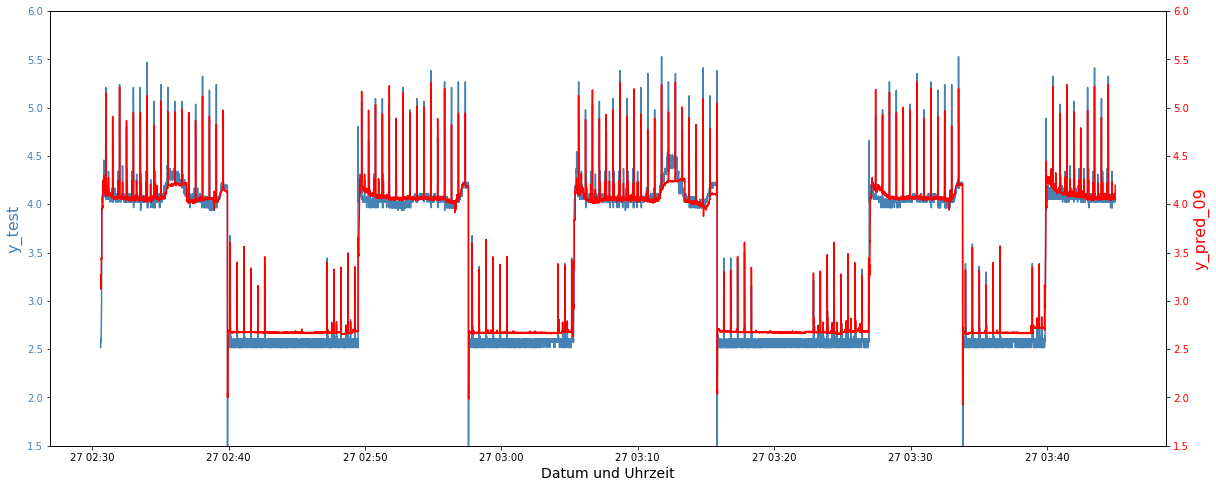

In [41]:
Daten_1=result
Daten_1=Daten_1[(Daten_1['CreateDateTime']>'2020-09-27 02:30:37')&(Daten_1['CreateDateTime']<'2020-09-27 03:45:00')]


fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('y_test', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.y_test, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
plt.ylim((1.5, 6))


#define second y-axis that shares x-axis with current plot


ax2 = ax.twinx()
#ax2 = ax.twiny()
#add second line to plot
ax2.set_ylabel('y_pred_09', color=col2, fontsize=16)
ax2.plot(Daten_1.CreateDateTime, Daten_1.y_pred_09_3, color=col2)
ax2.tick_params(axis='y', labelcolor=col2)
plt.ylim((1.5, 6))

In [43]:
print('预测结果的rmse是:')
print(mean_squared_error(result['y_test'], y_pred_09_3) ** 0.5)

预测结果的rmse是:
0.18789455217023715
